# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表

,metric
回測K棒數量,172
總報酬率,67.07
日報酬率,0.1447
最大回撤,-5.26
交易次數,145
勝率,31.03
平均每筆報酬率,3.61
平均獲利時報酬,17.41
平均虧損時報酬,-2.60
盈虧比,6.71


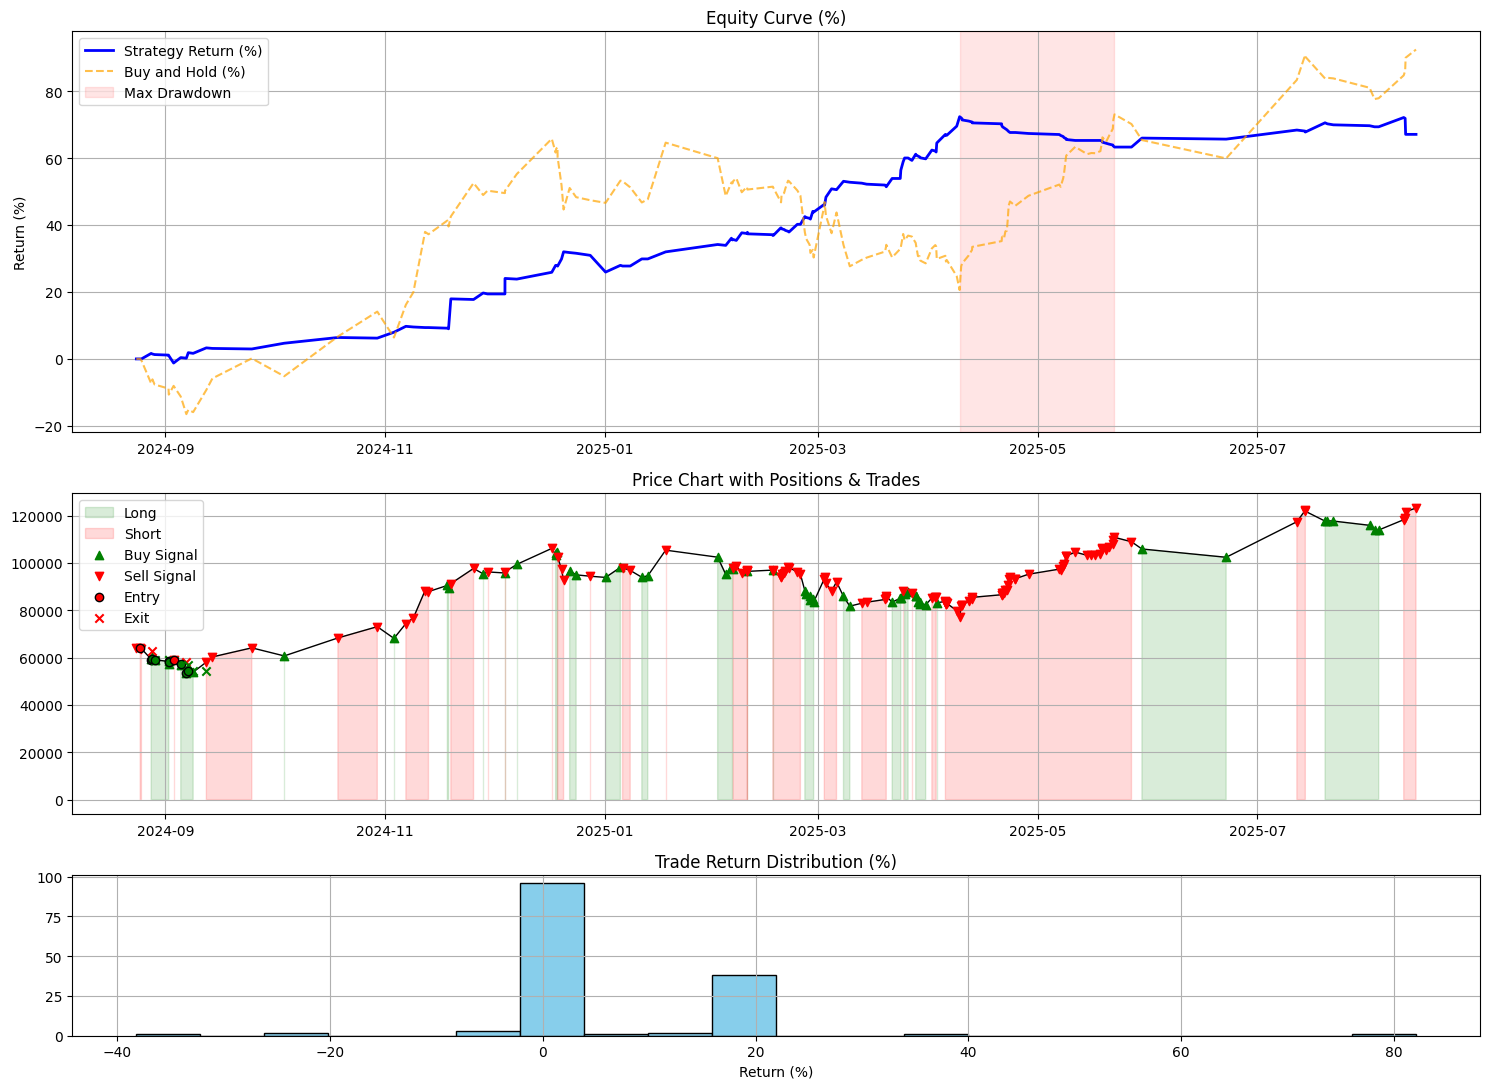

,timestamp,signal,close
72,2025-02-21 00:18:35,-1,98019.820000
73,2025-02-23 08:02:47,-1,96254.730000
74,2025-02-24 04:23:11,-1,95258.600000
75,2025-02-25 09:58:11,1,88263.060000
76,2025-02-25 18:58:11,1,87014.170000
77,2025-02-26 17:55:11,1,85860.260000
78,2025-02-26 22:54:11,1,84312.220000
79,2025-02-27 14:58:47,1,84898.270000
80,2025-02-27 20:29:59,1,83432.560000
81,2025-03-02 19:22:47,-1,93277.060000


In [6]:
from Technicalindicatorstrategy import vegas,turtle_strategy,WhaleSignal_WBTC
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = WhaleSignal_WBTC.get_signals('WBTCUSDT','1h',datetime.now(),10000)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 33, # 1000台幣
    fee_rate = 0.0005, # 合約手續費
    leverage = 10, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = 0.001,       # 停損閾值，例如0.05代表5%
    take_profit = 0.017,     # 停利閾值
    capital_ratio = 0.1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False
    )  
display(pd.DataFrame(result['metric'],index=['metric']).T)
plot_backtest_result(result)
display(df_signals[['timestamp','signal','close']].tail(100).style.background_gradient())

In [7]:
pd.DataFrame(result['trades_log']).tail(100).style.background_gradient()

,entry_time,exit_time,side,entry_price,exit_price,bars_held,return,reason
45,2025-02-05 01:18:59,2025-02-05 08:15:35,long,98286.907811,98093.425602,1,-0.019685,Stop Loss
46,2025-02-05 01:27:59,2025-02-05 12:32:59,long,98294.982201,98103.676302,1,-0.019462,Stop Loss
47,2025-02-05 08:15:35,2025-02-06 09:38:23,long,97912.087311,98007.611680,1,0.009756,Signal Change
48,2025-02-05 12:32:59,2025-02-07 21:56:59,short,98083.448256,98275.900610,1,-0.019583,Stop Loss
49,2025-02-06 09:38:23,2025-02-09 08:05:35,short,97962.436334,96349.486369,1,0.167406,Take Profit
50,2025-02-07 21:56:59,2025-02-09 11:20:35,short,95614.675852,95767.529151,1,-0.015961,Stop Loss
51,2025-02-09 08:05:35,2025-02-09 11:32:23,short,96921.761692,96659.005350,2,0.027184,Signal Change
52,2025-02-09 11:23:23,2025-02-09 11:32:35,long,96674.728403,96511.005184,1,-0.016935,Stop Loss
53,2025-02-09 11:32:23,2025-02-16 12:51:47,short,96543.628845,96701.610725,1,-0.016337,Stop Loss
54,2025-02-09 11:32:35,2025-02-16 12:58:59,short,96549.293594,96734.232850,1,-0.019118,Stop Loss
